<a href="https://colab.research.google.com/github/prasanthkavin/Final-Project/blob/main/Final_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Pre Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
import pandas as pd

df = pd.read_csv("/content/train.csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
32768,30,blue-collar,married,secondary,cellular,17.0,apr,191.0,1.0,failure,no
32769,39,blue-collar,married,primary,cellular,17.0,apr,206.0,1.0,unknown,no
32770,29,technician,married,secondary,cellular,17.0,apr,367.0,3.0,failure,yes
32771,39,management,married,secondary,telephone,17.0,apr,141.0,4.0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32773 entries, 0 to 32772
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32773 non-null  int64  
 1   job             32773 non-null  object 
 2   marital         32772 non-null  object 
 3   education_qual  32772 non-null  object 
 4   call_type       32772 non-null  object 
 5   day             32772 non-null  float64
 6   mon             32772 non-null  object 
 7   dur             32772 non-null  float64
 8   num_calls       32772 non-null  float64
 9   prev_outcome    32772 non-null  object 
 10  y               32772 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.8+ MB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32773.0,41.057029,9.617991,19.0,33.0,40.0,49.0,94.0
day,32772.0,16.498963,8.481927,1.0,9.0,17.0,23.0,31.0
dur,32772.0,254.692695,262.868545,0.0,100.0,173.0,309.0,4918.0
num_calls,32772.0,3.017027,3.464738,1.0,1.0,2.0,3.0,63.0


## **DATA IMBALANCE**

In [ ]:
df['y'].value_counts()

no     30787
yes     1985
Name: y, dtype: int64

In [ ]:
#percentage for each class (No/Yes)

print(f"Percentage of no:", (39922/(39922+5289)*100))
print(f"Percentage of yes:", (5289/(39922+5289)*100))

Percentage of no: 88.30151954170445
Percentage of yes: 11.698480458295547


The dataset is imbalanced as about 88% data belongs to class 'no' and only 11% belongs to class 'yes'

## **DATA CLEANING**

# Missing values and Duplicates

In [ ]:
df.isnull().sum()

age               0
job               0
marital           1
education_qual    1
call_type         1
day               1
mon               1
dur               1
num_calls         1
prev_outcome      1
y                 1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32773 entries, 0 to 32772
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32773 non-null  int64  
 1   job             32773 non-null  object 
 2   marital         32772 non-null  object 
 3   education_qual  32772 non-null  object 
 4   call_type       32772 non-null  object 
 5   day             32772 non-null  float64
 6   mon             32772 non-null  object 
 7   dur             32772 non-null  float64
 8   num_calls       32772 non-null  float64
 9   prev_outcome    32772 non-null  object 
 10  y               32772 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.8+ MB


In [ ]:
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28.0,may,124.0,1.0,unknown,no
8138,29,admin.,single,secondary,unknown,2.0,jun,121.0,4.0,unknown,no
11630,39,blue-collar,married,primary,unknown,19.0,jun,112.0,4.0,unknown,no
13400,36,blue-collar,married,secondary,cellular,9.0,jul,183.0,1.0,unknown,no
19826,36,management,married,tertiary,cellular,8.0,aug,75.0,2.0,unknown,no
19854,32,technician,single,tertiary,cellular,8.0,aug,31.0,2.0,unknown,no


In [ ]:
df.duplicated().sum()

6

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

# Unique values in categorical features

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
print(df['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'managem']


In [ ]:
print(df['marital'].unique())

['married' 'single' 'divorced' nan]


In [ ]:
print(df['education_qual'].unique())

['tertiary' 'secondary' 'unknown' 'primary' nan]


In [ ]:
print(df['call_type'].unique())

['unknown' 'cellular' 'telephone' nan]


In [ ]:
print(df['prev_outcome'].unique())

['unknown' 'failure' 'other' 'success' nan]


In [ ]:
print(df['mon'].unique())

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' nan]


In [ ]:
print(df["y"].unique())

['no' 'yes' nan]


# Distribution for continous features and Count of values in each categorical features

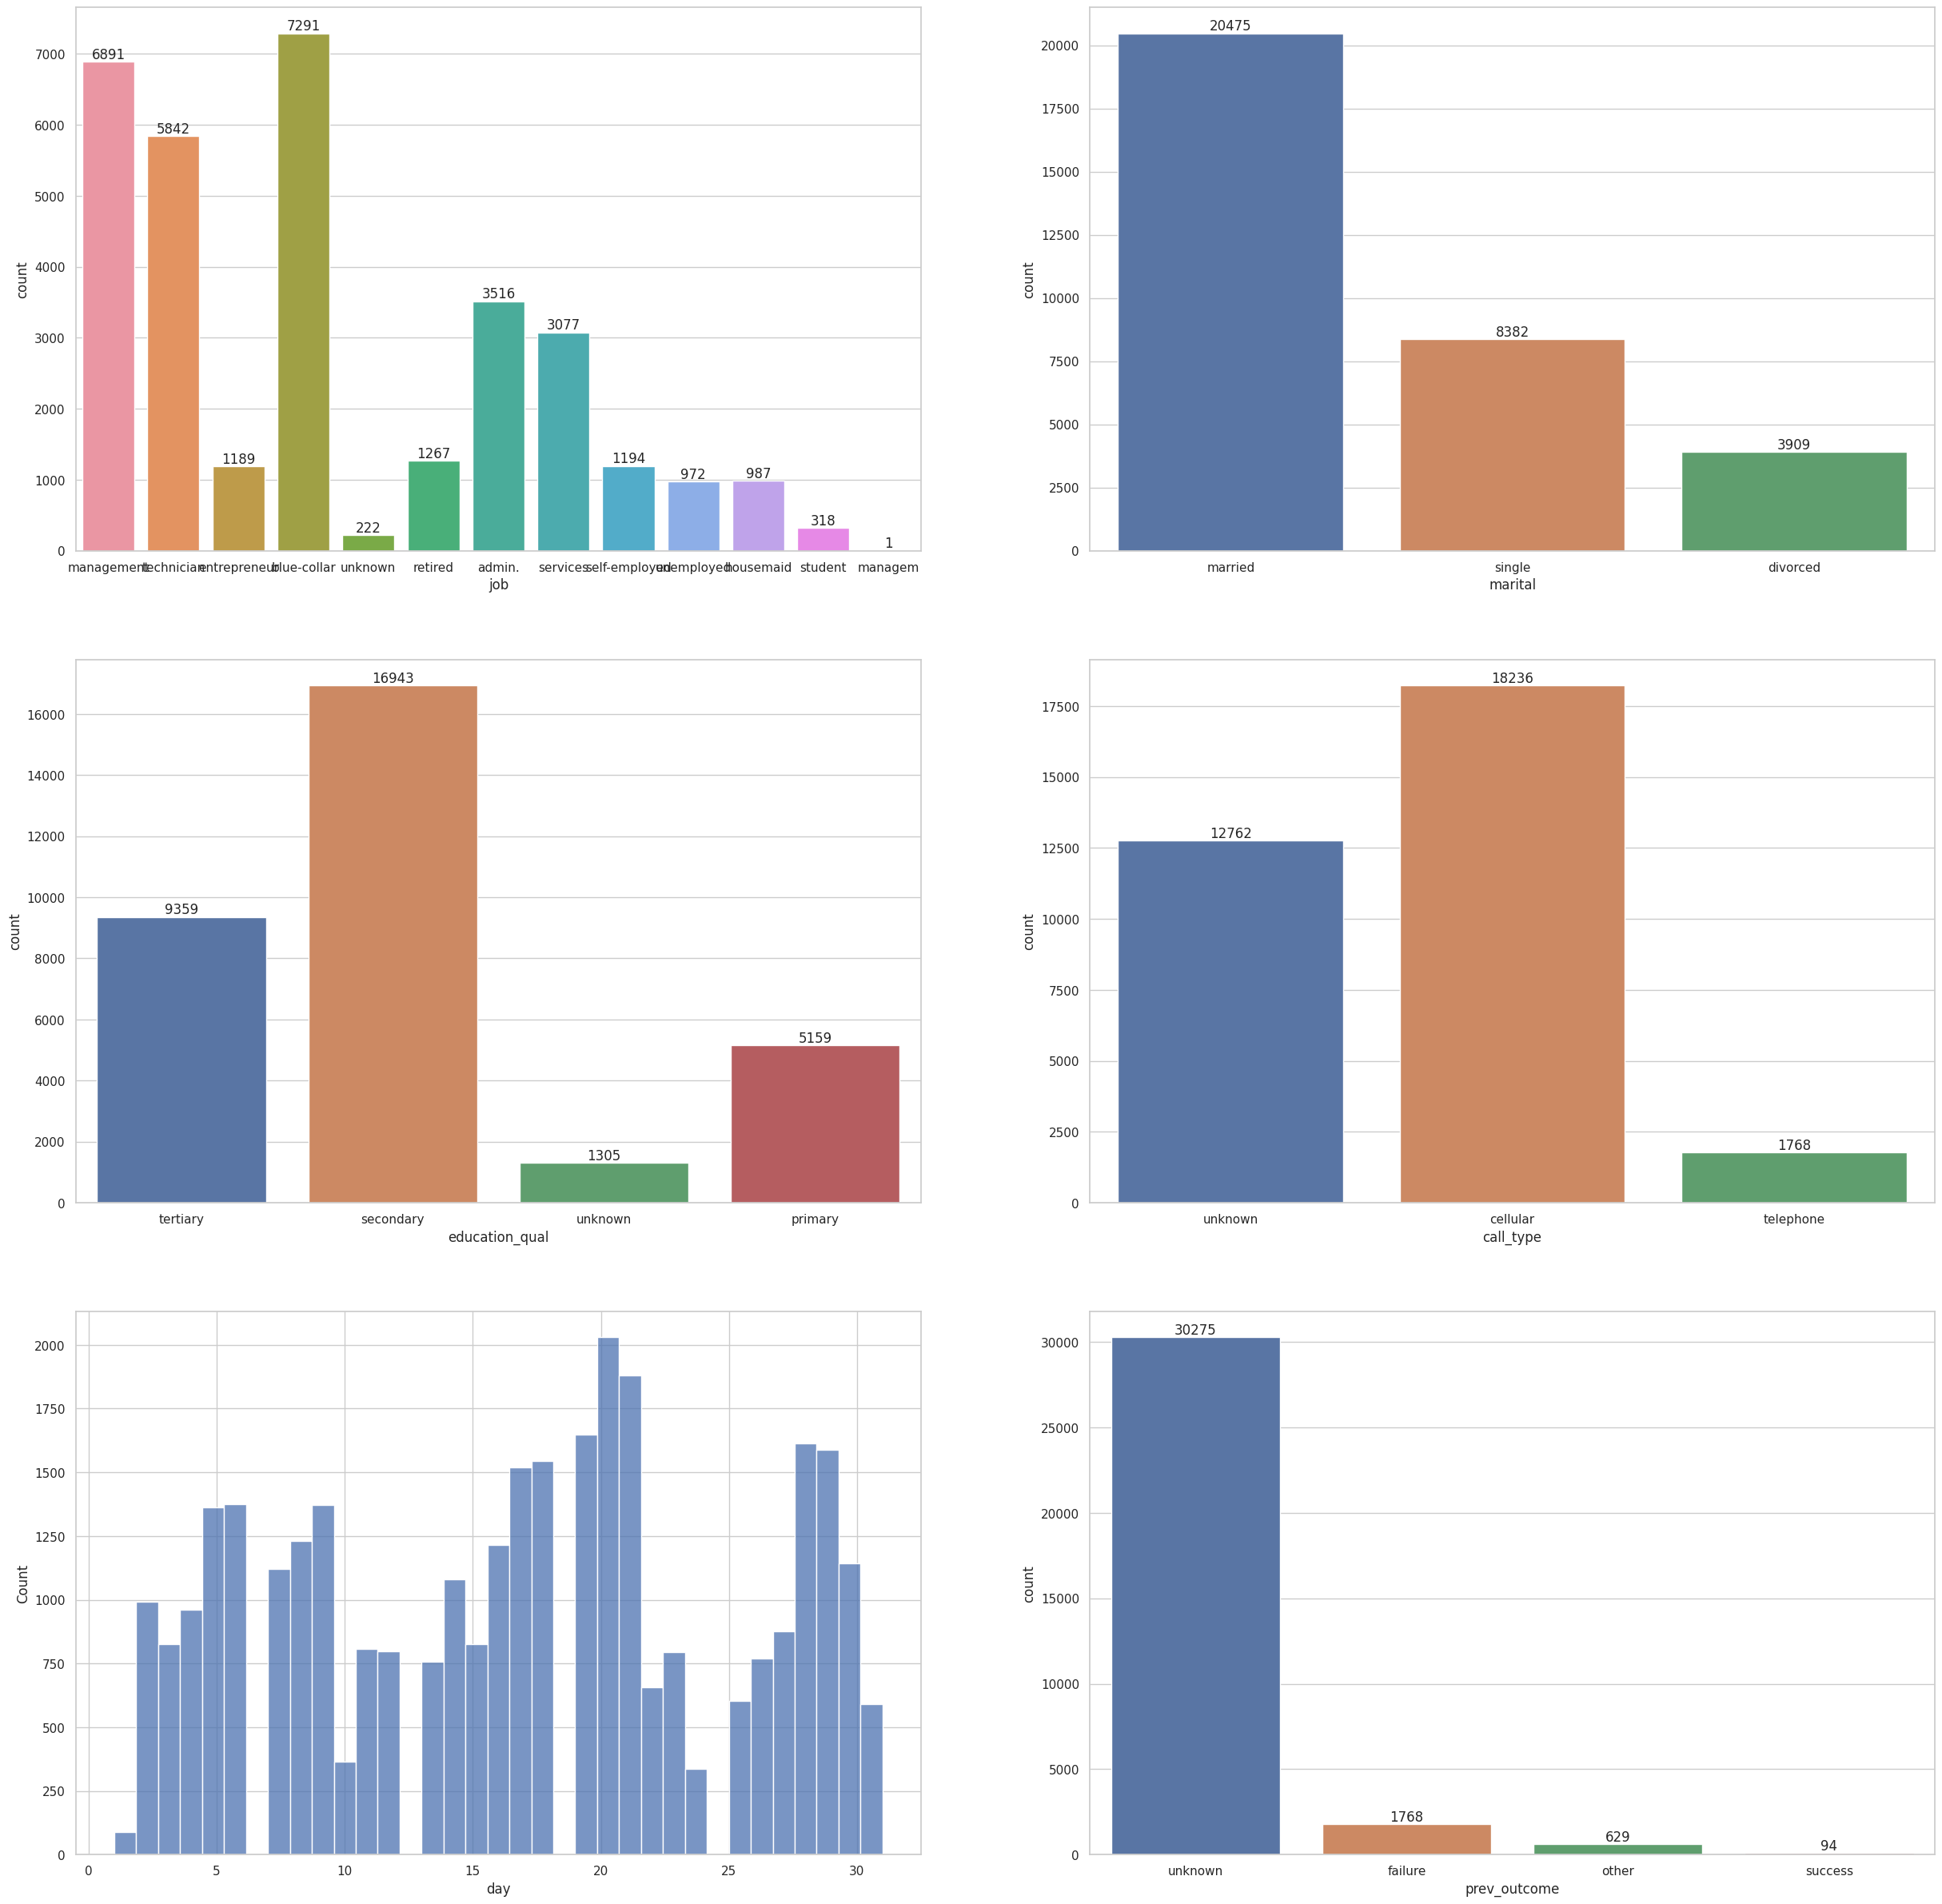

In [ ]:
plt.figure(figsize=(30,30))


plt.subplot(321)
ax = sns.countplot(data=df, x="job")
for i in ax.containers:
  ax.bar_label(i)

plt.subplot(322)
ax = sns.countplot(data=df, x="marital")
for i in ax.containers:
  ax.bar_label(i)

plt.subplot(323)
ax = sns.countplot(data=df, x="education_qual")
for i in ax.containers:
  ax.bar_label(i)


plt.subplot(324)
ax = sns.countplot(data=df, x="call_type")
for i in ax.containers:
  ax.bar_label(i)

plt.subplot(325)
sns.histplot(data=df, x='day')

plt.subplot(326)
ax = sns.countplot(data=df, x="prev_outcome")
for i in ax.containers:
  ax.bar_label(i)

<Axes: xlabel='num_calls', ylabel='Count'>

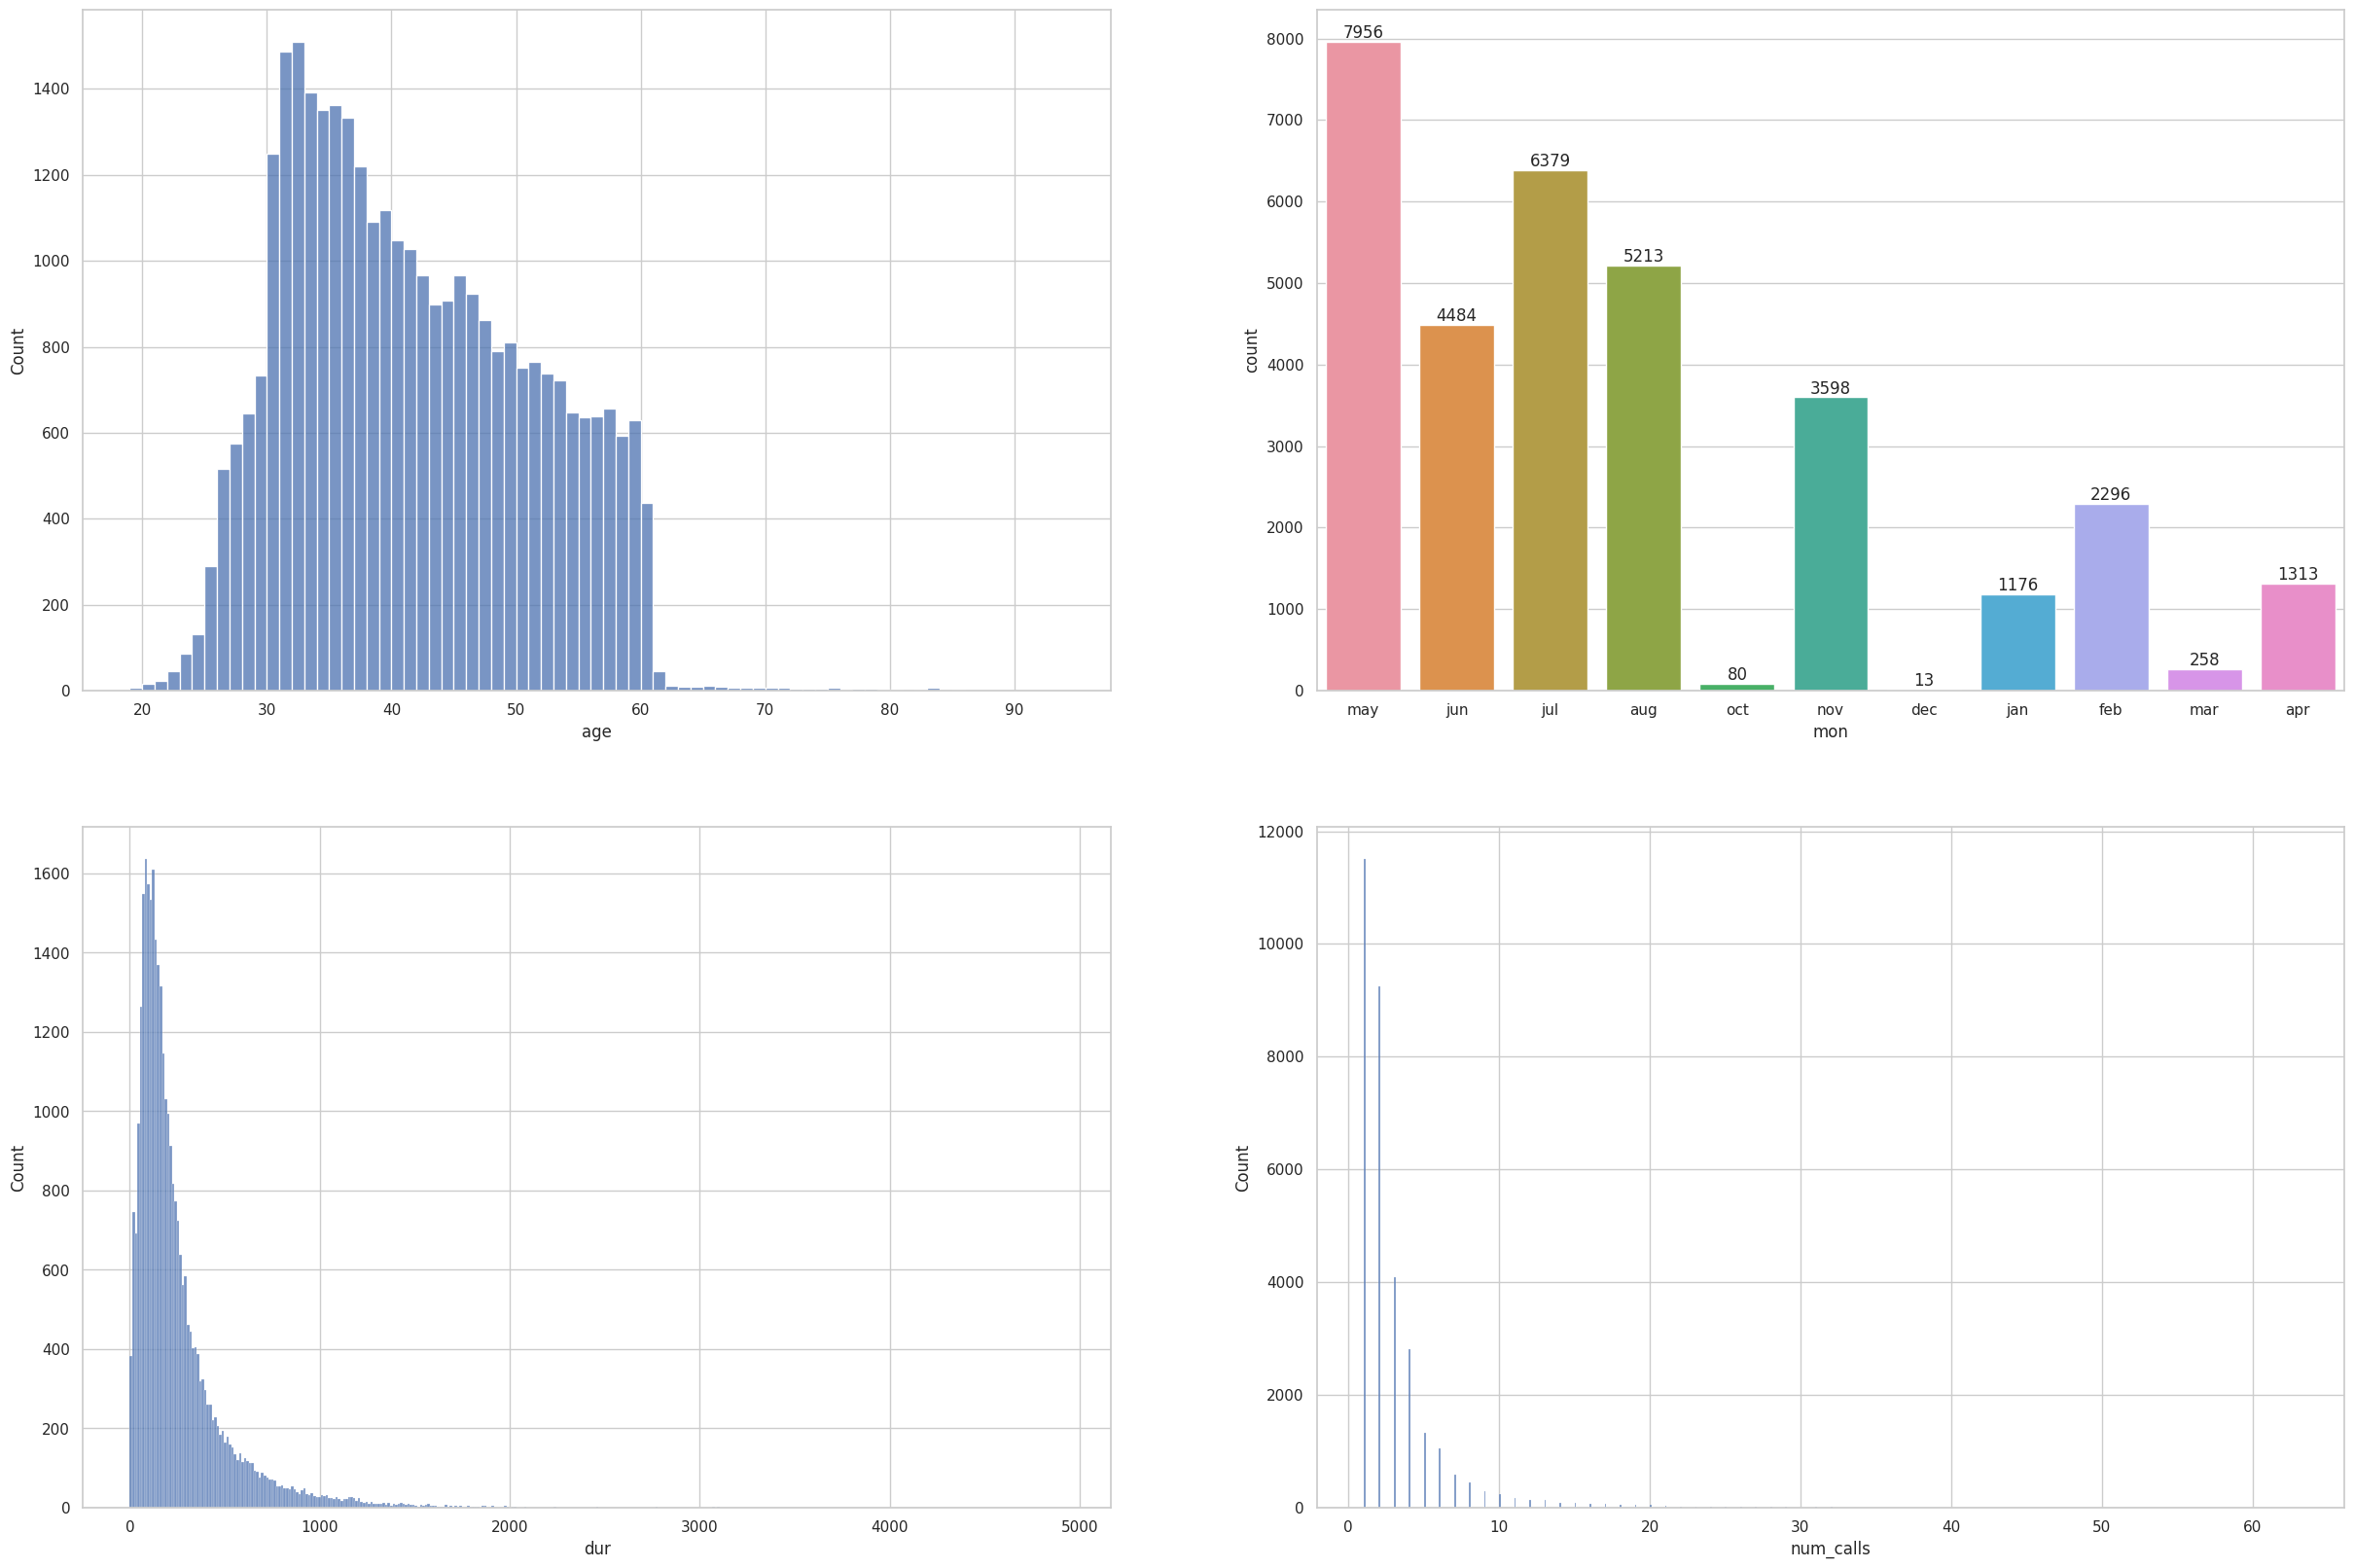

In [ ]:
plt.figure(figsize=(30,20))

plt.subplot(221)
sns.histplot(data=df, x='age')

plt.subplot(222)
ax = sns.countplot(data=df, x="mon")
for i in ax.containers:
  ax.bar_label(i)

plt.subplot(223)
sns.histplot(data=df, x='dur')

plt.subplot(224)
sns.histplot(data=df, x='num_calls')


# Exploring the Dataset and replace the unknown values

In [ ]:
df.job.value_counts()

blue-collar      7291
management       6891
technician       5842
admin.           3516
services         3077
retired          1267
self-employed    1194
entrepreneur     1189
housemaid         987
unemployed        972
student           318
unknown           222
managem             1
Name: job, dtype: int64

In [ ]:
#replacing unknown value as null
df['job'] =df['job'].replace('unknown',np.nan)


#counting the no of null value in jab column
df.job.isnull().sum()

<ipython-input-25-c3e24504a94c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] =df['job'].replace('unknown',np.nan)


222

In [ ]:
#removing null values from job column
df=df.dropna(subset=['job'])

In [ ]:
#after removing null values checking for the summ of null vaues
df.job.isnull().sum()

0

In [ ]:
#no of counts for Educational qualification
df.education_qual.value_counts()

secondary    16887
tertiary      9334
primary       5116
unknown       1207
Name: education_qual, dtype: int64

In [ ]:
#replacing unknown value as null
df['education_qual'] =df['education_qual'].replace('unknown',np.nan)


#checking for null values
df.education_qual.isnull().sum()

<ipython-input-29-a5cba20f552f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_qual'] =df['education_qual'].replace('unknown',np.nan)


1208

In [ ]:
#droping the null values
df = df. dropna(subset=['education_qual'])


#checking for null value after deleting
df.education_qual.isnull().sum()


0

In [ ]:
#no of counts for Call type
df.call_type.value_counts()

cellular     17637
unknown      12040
telephone     1660
Name: call_type, dtype: int64

In [ ]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((12283) / (29285+13020+12283)) * 100 )

Percentage for "Unknown":  22.501282333113505


hence it is 23% we can keep it

In [ ]:
df.prev_outcome.value_counts()

unknown    28930
failure     1710
other        607
success       90
Name: prev_outcome, dtype: int64

In [ ]:
print('Percentage for "Unknown": ',((35280) / (35280+4709+1774+1424)) * 100 )

Percentage for "Unknown":  81.69124968161715


It is around 81% values are unknown. So will keep unknown value as it is.

## **Outlier Deduction and Correction**

**Outlier Detection**

Z-Score Z-Score(x)=(x-mean(x)) / SD(x) Threshold Limit Z-Score > 3 and Z-Score < -3 ---> Outlier
IQR IQR = Q3(75%)-Q1(25%) Upper Threshold = Q3 + (1.5 * IQR) Lower Threshold = Q1 - (1.5 * IQR)
Plotting Box Plot

**Outlier Correction**

Deletion

Clip/Strip

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31337 entries, 0 to 32771
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             31337 non-null  int64  
 1   job             31337 non-null  object 
 2   marital         31337 non-null  object 
 3   education_qual  31337 non-null  object 
 4   call_type       31337 non-null  object 
 5   day             31337 non-null  float64
 6   mon             31337 non-null  object 
 7   dur             31337 non-null  float64
 8   num_calls       31337 non-null  float64
 9   prev_outcome    31337 non-null  object 
 10  y               31337 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.9+ MB


# AGE

<Axes: xlabel='age'>

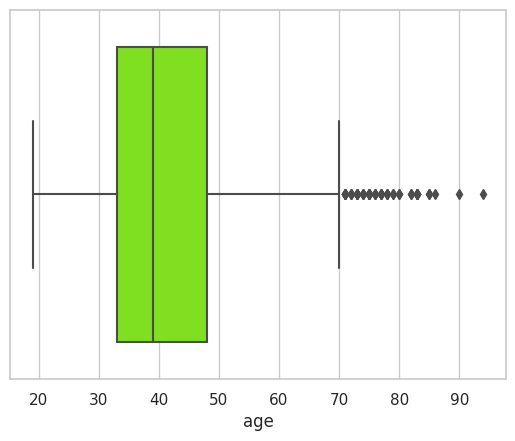

In [ ]:
#Outlier Detuction using Box Plot for Age Column
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='Chartreuse')

In [ ]:
#detecting Outlier for Age column
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 70.5 Lower age bound : 10.5


In [ ]:
#removing outlier for age column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.age = df.age.clip(10.5,70.5)

In [ ]:
df.age.describe()

count    31337.000000
mean        40.882375
std          9.533844
min         19.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

<Axes: xlabel='age'>

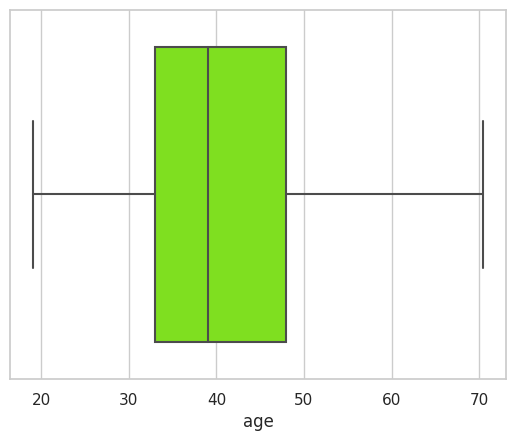

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='Chartreuse')

# DAY

<Axes: xlabel='day'>

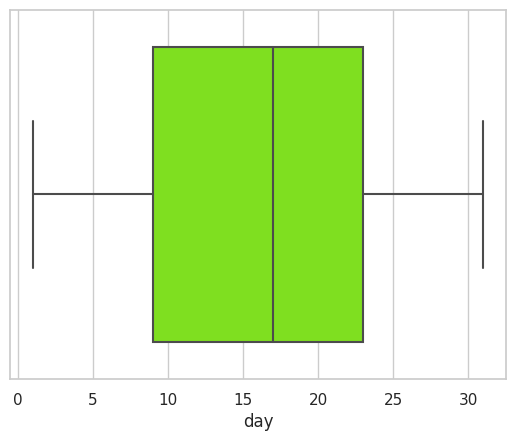

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df['day'], color='Chartreuse')

In [ ]:
#detecting Outlier for Age column
q1,q3=np.percentile(df["day"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 44.0 Lower bound : -12.0


In [ ]:
df.day.describe()


count    31337.000000
mean        16.516227
std          8.470631
min          1.000000
25%          9.000000
50%         17.000000
75%         23.000000
max         31.000000
Name: day, dtype: float64

From Box plot itself we can tell there is no outlier, even though checked with IQR approach. min and max values are in between lower and upper bound.

# Duration

<Axes: >

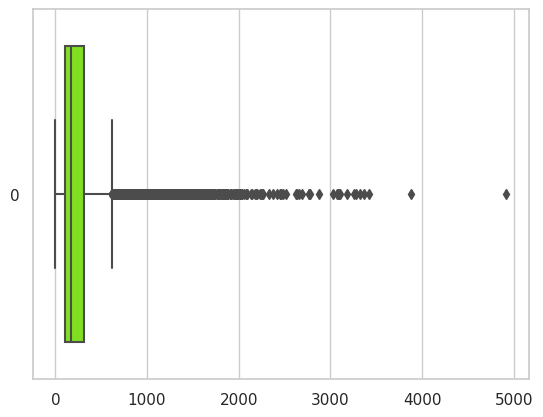

In [ ]:
#Outlier Detuction using Box Plot for duration Column
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='Chartreuse',orient = "h")

In [ ]:
#detecting Outlier for Duration column
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 622.5 Lower bound : -213.5


In [ ]:
#removing outlier for duration column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.dur = df.dur.clip(-219.5,640.5)

In [ ]:
df.dur.describe()

count    31337.000000
mean       230.331158
std        176.178173
min          0.000000
25%        100.000000
50%        173.000000
75%        309.000000
max        640.500000
Name: dur, dtype: float64

<Axes: >

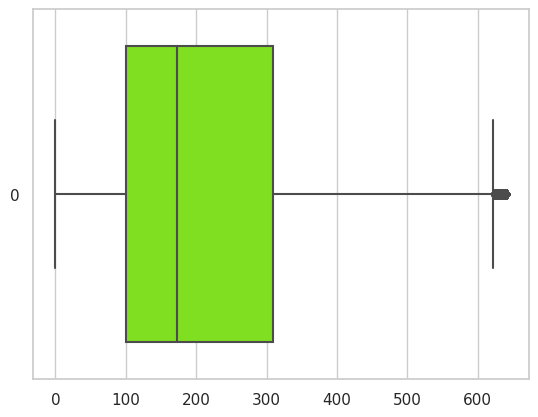

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='Chartreuse',orient="h")

# NUMBER OF CALLS

<Axes: >

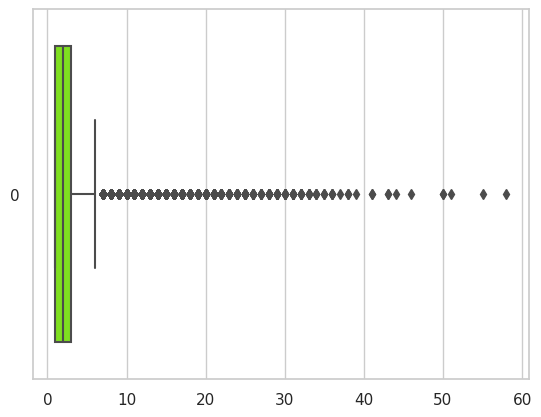

In [ ]:

#checking for outlier using boxplot fot the column no of calls
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='Chartreuse',orient="h")

In [ ]:

#detecting Outlier for number of calls column
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [ ]:
#removing outlier for num_calls column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.num_calls = df.num_calls.clip(-2,6.0)


In [ ]:
df.num_calls.describe()


count    31337.000000
mean         2.528545
std          1.656933
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

<Axes: >

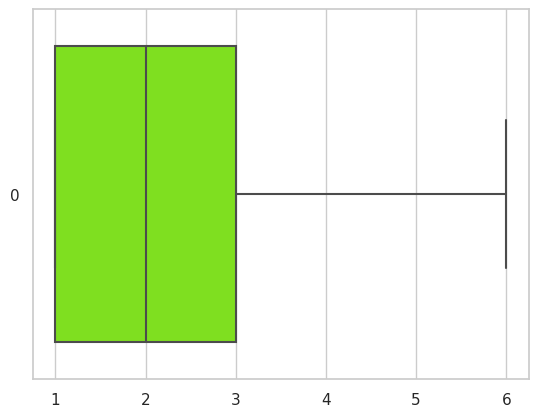

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='Chartreuse',orient="h")

## **ETA**

<ipython-input-54-d3aeb1eba1ae>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


Text(0.5, 1.0, 'Previous outcome')

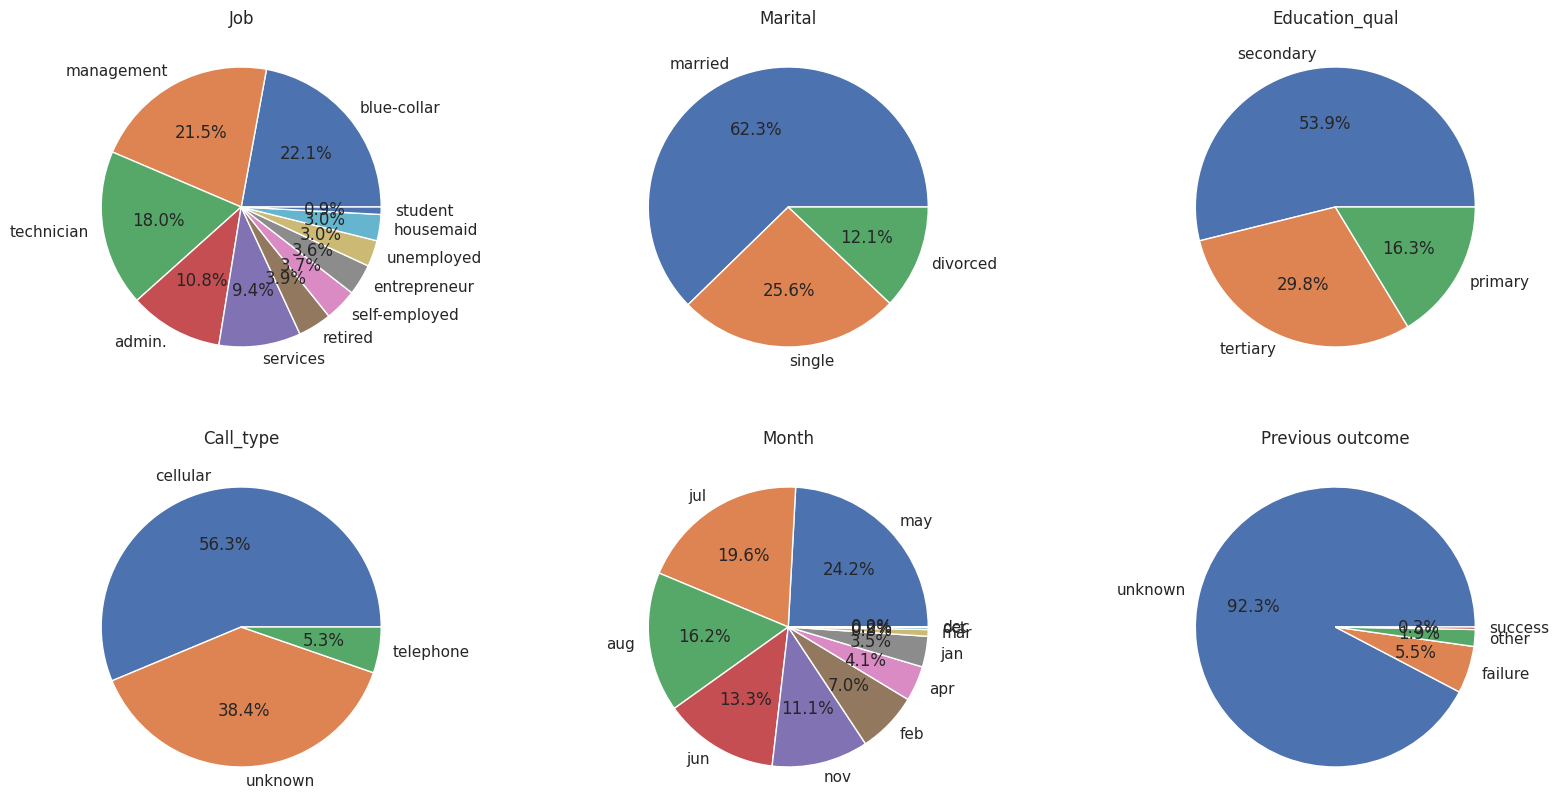

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Distribution of Categorical Features")

#Percentage Distribution of job
plt.subplot(231)
df_source = df.job.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['job'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Job')

#Percentage Distribution of marital
plt.subplot(232)
df_source = df.marital.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['marital'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Marital')

#Percentage Distribution of education_qual
plt.subplot(233)
df_source = df.education_qual.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['education_qual'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Education_qual')

#Percentage Distribution of call_type
plt.subplot(234)
df_source = df.call_type.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['call_type'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Call_type')

#Percentage Distribution of month
plt.subplot(235)
df_source = df.mon.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['mon'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Month')

#Percentage Distribution of previous outcome
plt.subplot(236)
df_source = df.prev_outcome.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['prev_outcome'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Previous outcome')

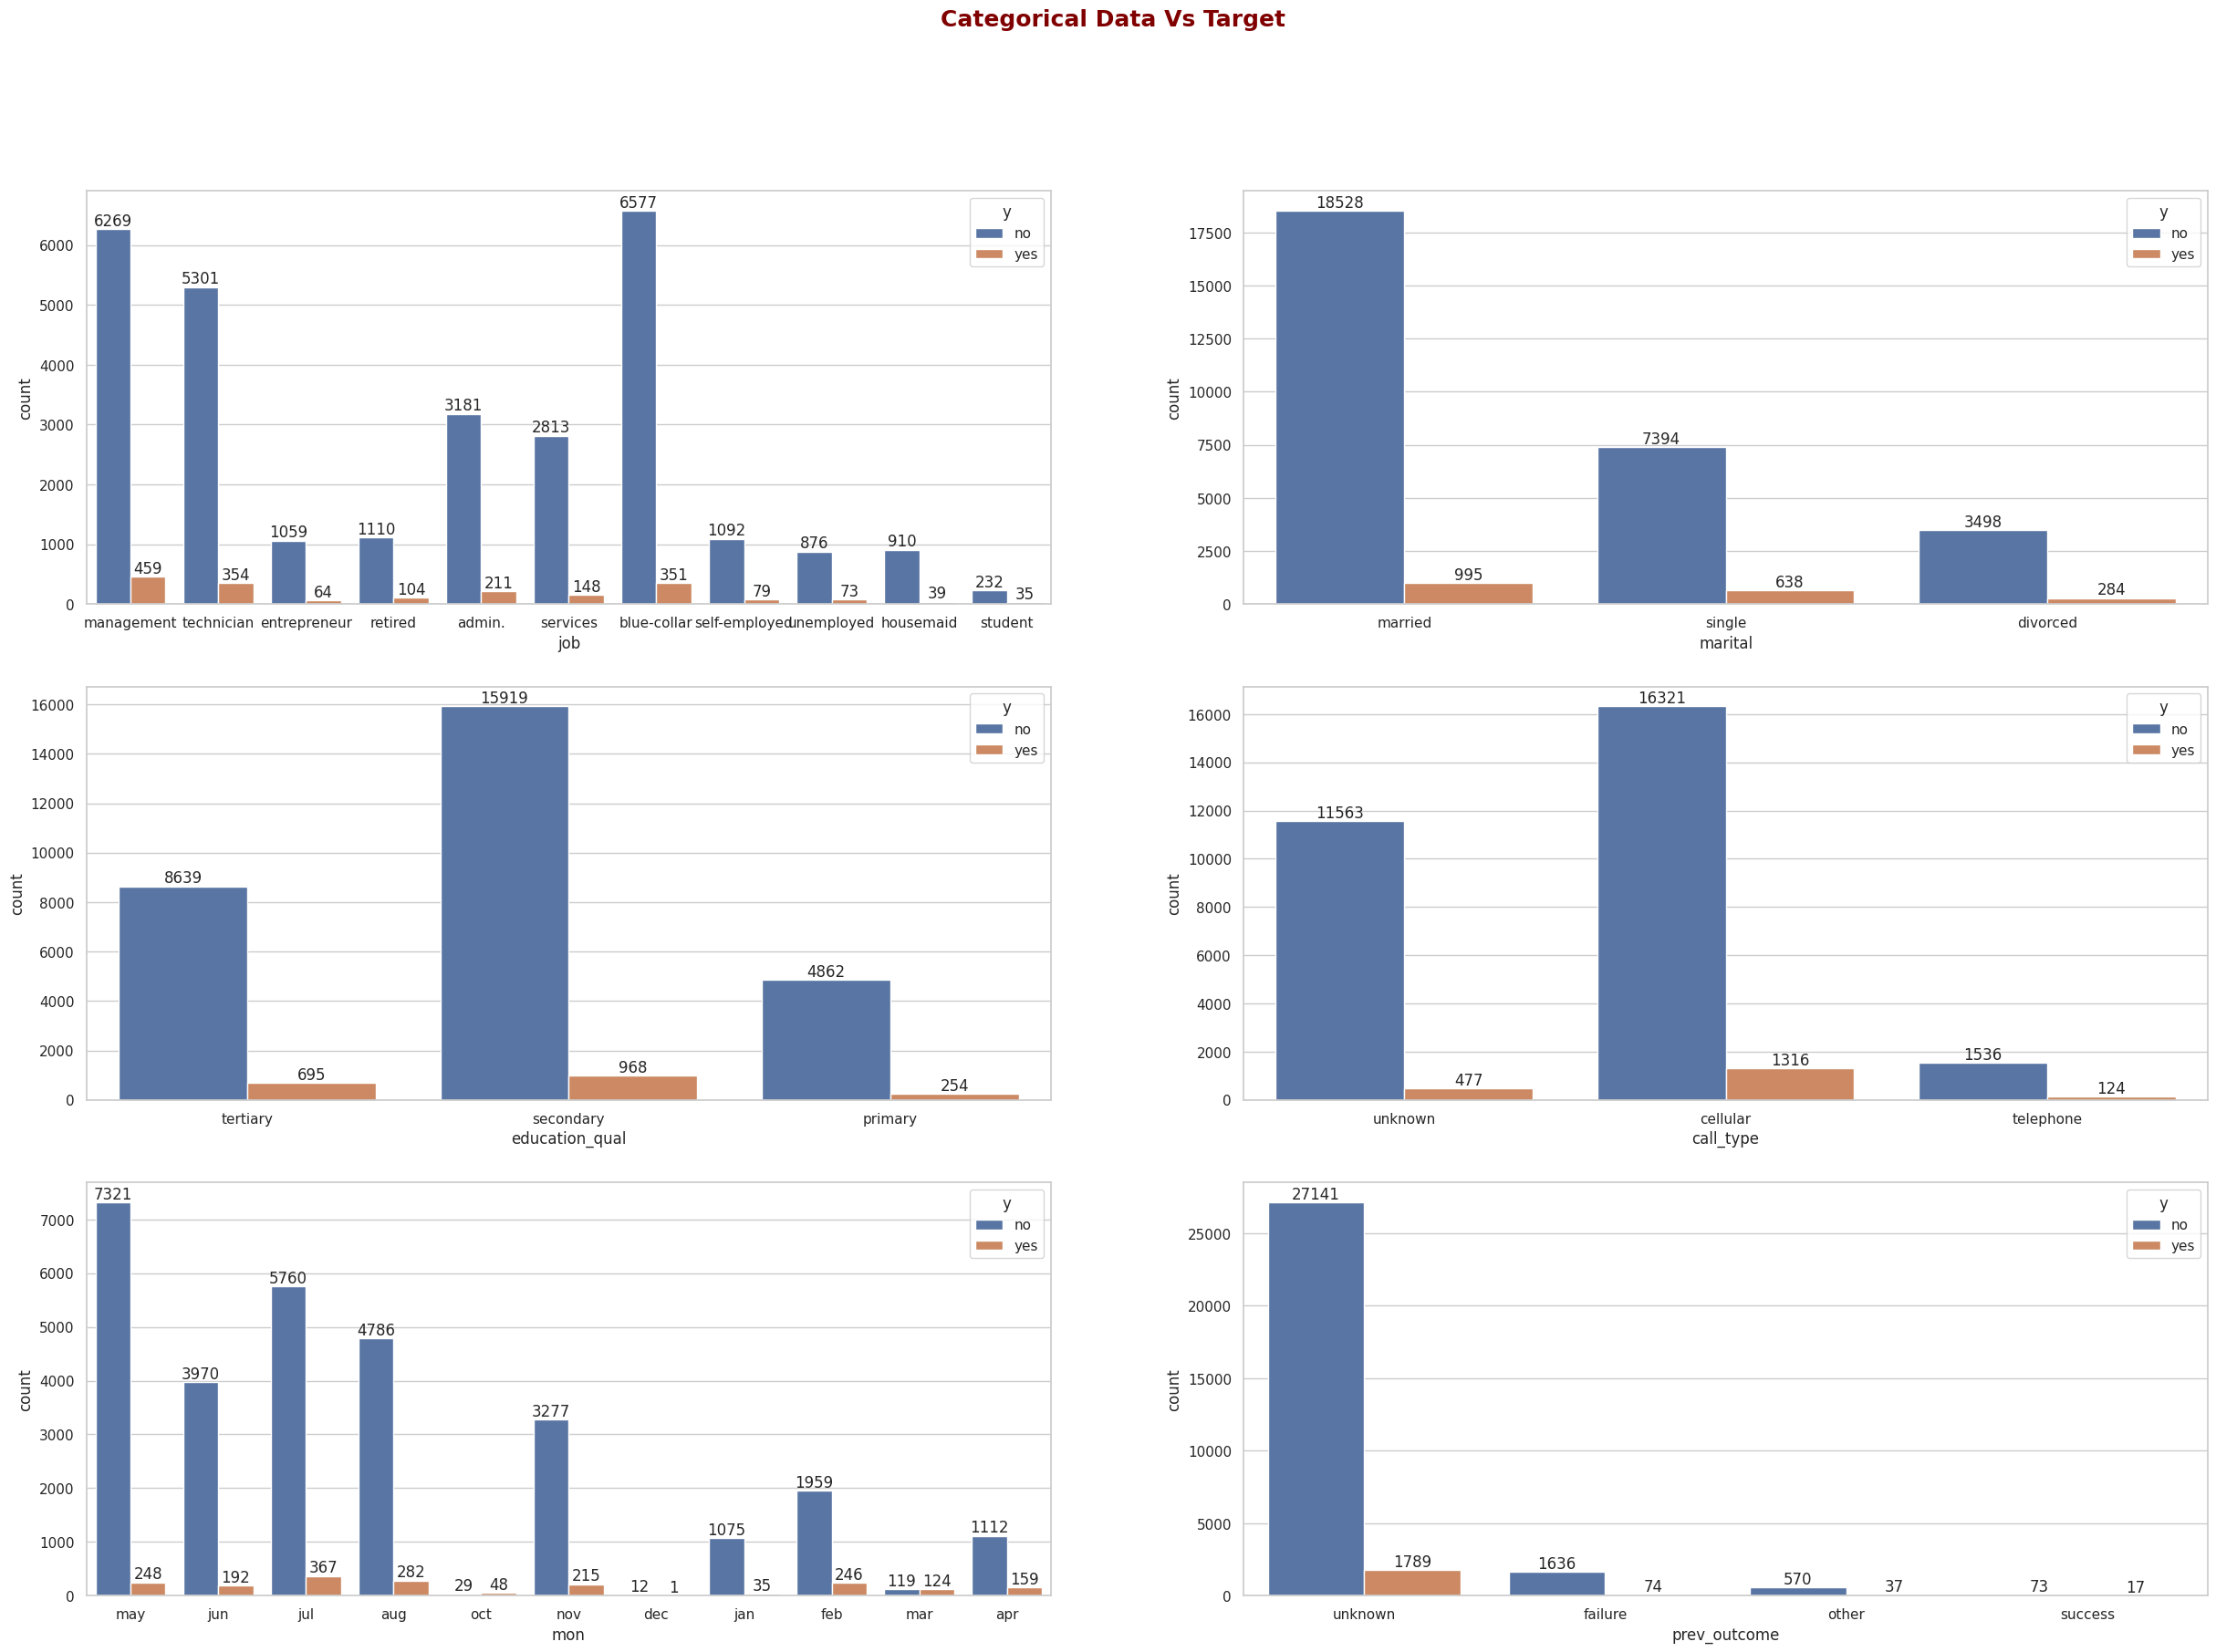

In [ ]:
plt.figure(figsize=(30,20))
plt.suptitle("Categorical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon')

plt.subplot(321)
ax = sns.countplot(data=df, x="job", hue="y")
for i in ax.containers:
  ax.bar_label(i)

plt.subplot(322)
ax = sns.countplot(data=df, x="marital", hue="y")
for i in ax.containers:
  ax.bar_label(i)

plt.subplot(323)
ax = sns.countplot(data=df, x="education_qual", hue="y")
for i in ax.containers:
  ax.bar_label(i)

plt.subplot(324)
ax = sns.countplot(data=df, x="call_type", hue="y")
for i in ax.containers:
  ax.bar_label(i)

plt.subplot(325)
ax = sns.countplot(data=df, x="mon", hue="y")
for i in ax.containers:
  ax.bar_label(i)

plt.subplot(326)
ax = sns.countplot(data=df, x="prev_outcome", hue="y")
for i in ax.containers:
  ax.bar_label(i)

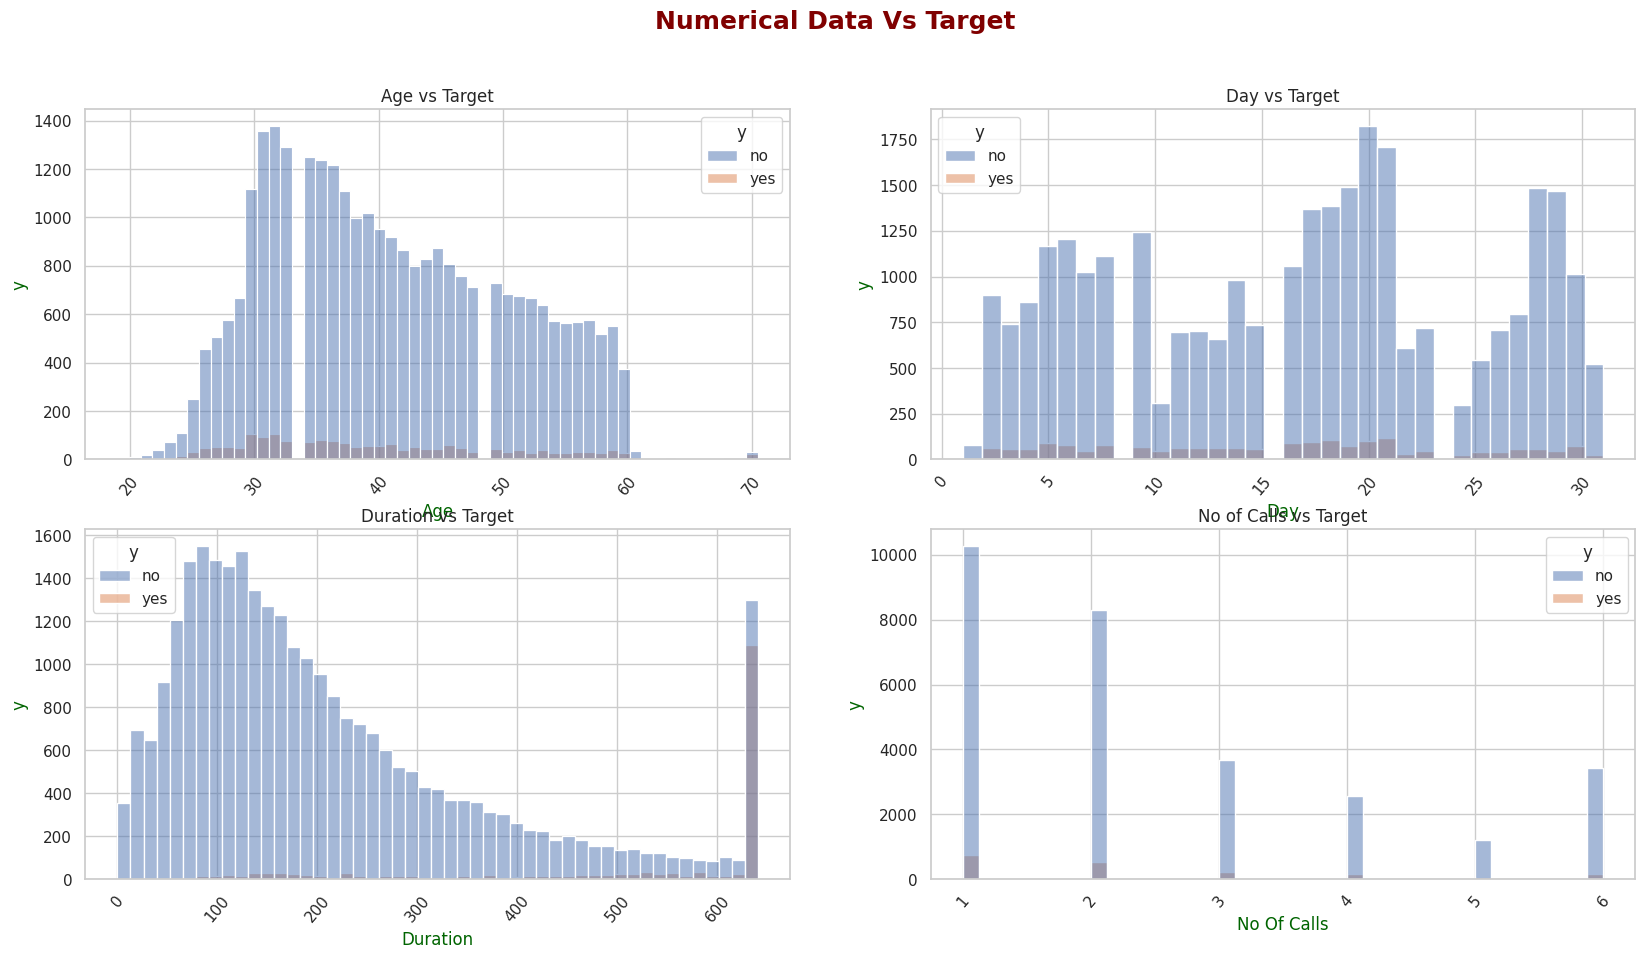

In [ ]:
plt.figure(figsize=(20, 10))
#sub title to show title for overall plot
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon')

#Age vs Target
plt.subplot(2,2,1)
sns.histplot(x='age',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Age vs Target')
plt.xlabel('Age', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')


#Day vs Target
plt.subplot(2,2,2)

sns.histplot(x='day',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Day vs Target')
plt.xlabel('Day', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['day','target']].corr()

#Duration vs Target
plt.subplot(2,2,3)
sns.histplot(x='dur',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Duration vs Target')
plt.xlabel('Duration', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#No of Calls vs Target
plt.subplot(2,2,4)
sns.histplot(x='num_calls',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('No of Calls vs Target' )
plt.xlabel('No Of Calls', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()

# **Findings**:

#Percentage of people Subscribed -- Categorical Data Vs Target (Categorical)
#Jobs vs Target

Most subscribed % : Student, retired

Least Subscribed % : blue-collar

#Marital Status vs Target


Most subscribed % : Single

Least Subscribed % : Married


#Educational Qualification vs Target

Most subscribed % : teritary

Least Subscribed % : primary

#Month vs Target


Most subscribed % : March, September

Least Subscribed % : May

#Call Type vs Target


Most subscribed % : Cellular

Least Subscribed % : unknown


#Previous Outcome vs Target

Most subscribed % : Success

Least Subscribed % : unknown




##Numeric Data vs Target
#Age vs Target

Target : Middle age people

Subscribed : Middle age people

#Day vs Target

Target : Middle of Month

Subscribed : Middle of Month

#Duration vs Target

Duration of call is also important to subscribe for insurance.

#No of Calls vs Target

No of calls increase subscrition also getting increase.

### **KEY FINDINGS**

```
`# This is formatted as code`
```



1.   Blue collar job peoples are mostly targeted by the bank officials followed by management professionals. Management professionals were converted successfully as a customer followed by technicians and admins. So, they have to target more technicians and admins as they have more success on customer conversion than blue collar job professionals.
2. Bank professionals contacted married people the most followed by singles and divorced people. But, the coustomer conversion success percent is more for singles(14.8%) followed by divorced (11.9%) and married has low 10% success. So, I suggest to target more singles and divorced people also.
3. In the case of education_qual, Bank professionals contacted secondary qualified people the most followed by tertiary and primary  qualified people. But, the coustomer conversion success percent is more for tertiary qualified people(15%) followed by secondary qualified (10.5%). So, I suggest to target more tertiary qualified people also.
4. Bnak professionals contacted via cell phones and have found successs in that.  
5. Bank professionals contacted people mostly in may month as also found succcess in that followed by july. But August month have the 2nd most customer conversion success than july so, I suggest to cintact more people in August also.
6. Most of the previous outcomes are recorded as "unknown" followed by "Failure". As "First impression is the Best impression" they need to track the previous outcomes and try to improve the customer conversion rate.






In [ ]:
df.columns


Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']]
y=df['y']

In [ ]:
print(x.shape)
x[0:5]

(31337, 10)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown
5,35.0,management,married,tertiary,unknown,5.0,may,139.0,1.0,unknown
6,28.0,management,single,tertiary,unknown,5.0,may,217.0,1.0,unknown


In [ ]:
!pip install category_encoders
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce

# Define the ordinal encoder
encoder = ce.OrdinalEncoder(cols=['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'])


# Create the pipeline
pipeline = Pipeline([
    ('encoder', encoder),    # Apply ordinal encoding
       # Apply standardization
])
# Fit and transform the training data
x = pipeline.fit_transform(x)

In [ ]:
#from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[ 1.79548753, -1.23833087, -0.70998831, -1.30021449, -1.16866399,
        -1.35956933, -1.01752241,  0.17408133, -0.92252901, -0.26538105],
       [ 0.32701126, -0.88062306,  0.71658926,  0.20223108, -1.16866399,
        -1.35956933, -1.01752241, -0.45029655, -0.92252901, -0.26538105],
       [-0.82679153, -0.52291524, -0.70998831,  0.20223108, -1.16866399,
        -1.35956933, -1.01752241, -0.87600874, -0.92252901, -0.26538105],
       [-0.6170092 , -1.23833087, -0.70998831, -1.30021449, -1.16866399,
        -1.35956933, -1.01752241, -0.5184105 , -0.92252901, -0.26538105],
       [-1.35124734, -1.23833087,  0.71658926, -1.30021449, -1.16866399,
        -1.35956933, -1.01752241, -0.07566982, -0.92252901, -0.26538105]])

In [ ]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )


In [ ]:
#Balancing the data
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [ ]:
print(len(x_train_smt))
print(len(y_train_smt))

43746
43746


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_smt,y_train_smt)


LogisticRegression()

In [ ]:
y_pred = lr.predict_proba(x_test) #predicting using balanced test data
y_pred

array([[9.89632190e-01, 1.03678104e-02],
       [2.40825016e-01, 7.59174984e-01],
       [8.80372153e-04, 9.99119628e-01],
       ...,
       [9.81899763e-01, 1.81002367e-02],
       [9.59590529e-01, 4.04094710e-02],
       [9.62995293e-01, 3.70047070e-02]])

In [ ]:
from sklearn.metrics import roc_auc_score
print("The AUROC Score for Logistic Regression model is :", roc_auc_score(y_test, y_pred[:,1]))

The AUROC Score for Logistic Regression model is : 0.9103408359553777


## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(x_train_smt,y_train_smt) # training the model
  print("K value  : " , i, " train score : ", knn.score(x_train_smt,y_train_smt) , " cv score : ", np.mean(cross_val_score(knn, x_train_smt, y_train_smt, cv=10, scoring = "roc_auc"))) #predicting using the model

K value  :  1  train score :  1.0  cv score :  0.9984844147955092
K value  :  2  train score :  0.9999771407671558  cv score :  0.9985798258004989
K value  :  3  train score :  0.9987884606592603  cv score :  0.998670206285299
K value  :  4  train score :  0.9988570383577927  cv score :  0.9987101921841898
K value  :  5  train score :  0.9966854112375989  cv score :  0.9987202270193987
K value  :  6  train score :  0.9967539889361313  cv score :  0.9987213867966233
K value  :  7  train score :  0.9923878754628994  cv score :  0.998713588255343
K value  :  8  train score :  0.9929364970511589  cv score :  0.9987424346574221
K value  :  9  train score :  0.9880446212225118  cv score :  0.9987788503723307
K value  :  10  train score :  0.9887532574406803  cv score :  0.9987749716978358
K value  :  20  train score :  0.972408905957116  cv score :  0.9976676194615154
K value  :  50  train score :  0.9533671649979427  cv score :  0.993405551896706


In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(x_train_smt,y_train_smt)
print("Knn score :", knn.score(x_test, y_test))
print("The AUROC Score for KNN model is :", roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))

Knn score : 0.8465220165922144
The AUROC Score for KNN model is : 0.8885813697797483


## **XG Boost**

In [ ]:
# Encoding 'y'
y_train_smt = y_train_smt.map({'no' : 0, 'yes' : 1})
y_train_smt

0        0
1        0
2        0
3        0
4        0
        ..
43779    1
43780    1
43781    1
43782    1
43783    1
Name: y, Length: 43784, dtype: int64

In [ ]:
y_test = y_test.map({'no' : 0, 'yes' : 1})
y_test

12785    0
21992    0
31000    0
2140     0
12622    0
        ..
12843    0
20551    0
13167    0
21566    0
17724    0
Name: y, Length: 6268, dtype: int64

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train_smt,y_train_smt) #train the model
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))


Learning rate :  0.01  Train score :  0.9698748401242463  Cross-Val score :  0.941289216360681
Learning rate :  0.02  Train score :  0.972912479444546  Cross-Val score :  0.9414489607696266
Learning rate :  0.03  Train score :  0.9755846884706743  Cross-Val score :  0.940970746645877
Learning rate :  0.04  Train score :  0.9784396126438881  Cross-Val score :  0.9395343208442251
Learning rate :  0.05  Train score :  0.9802439247213593  Cross-Val score :  0.9388966170873015
Learning rate :  0.1  Train score :  0.9891056093550156  Cross-Val score :  0.938258913330378
Learning rate :  0.11  Train score :  0.9900648638772154  Cross-Val score :  0.9393748312110513
Learning rate :  0.12  Train score :  0.9907500456787868  Cross-Val score :  0.9393745764352793
Learning rate :  0.13  Train score :  0.9907957244655582  Cross-Val score :  0.9376207000219108
Learning rate :  0.14  Train score :  0.9914580668737438  Cross-Val score :  0.9392158511294211
Learning rate :  0.15  Train score :  0.99216

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.02, n_estimators=100, verbosity = 0) # initialise the model
model.fit(x_train_smt,y_train_smt)
print( "The AUROC Score for XG Boost model is: ",roc_auc_score( y_test, model.predict_proba(x_test)[:, 1]))

The AUROC Score for XG Boost model is:  0.9389451784181923


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,5175,713,5888
1,40,340,380
All,5215,1053,6268


In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      5888
           1       0.32      0.89      0.47       380

    accuracy                           0.88      6268
   macro avg       0.66      0.89      0.70      6268
weighted avg       0.95      0.88      0.90      6268



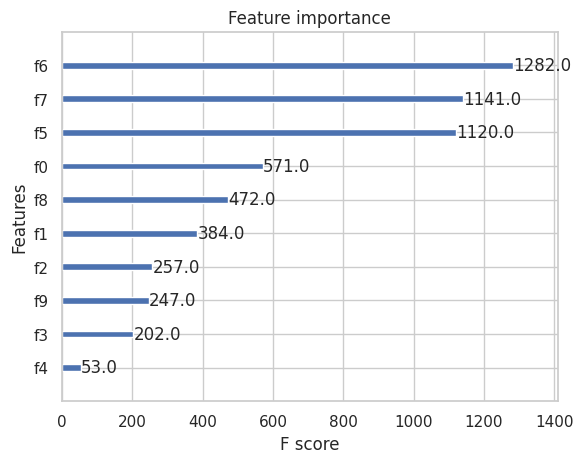

In [ ]:
from xgboost import plot_importance
# plot feature importance
plot_importance(model)
plt.show()

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Training Model
model = RandomForestClassifier(n_estimators=500, max_depth=50, min_samples_leaf=100, random_state= 42)
model.fit(x_train_smt, y_train_smt)



RandomForestClassifier(max_depth=50, min_samples_leaf=100, n_estimators=500,
                       random_state=42)

In [ ]:
# Predict the Test set results
y_pred = model.predict(x_test)

In [ ]:
# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score  : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score  : 0.8703


In [ ]:
import pandas as pd

# Get the column names from the ordinal encoder
encoded_columns = pipeline.named_steps['encoder'].get_feature_names_out()

# Create a DataFrame with feature scores
feature_scores = pd.DataFrame({'Feature': encoded_columns, 'Importance': model.feature_importances_})

# Sort the DataFrame by feature importance in descending order
feature_scores = feature_scores.sort_values('Importance', ascending=False)

# Print the feature scores
print(feature_scores)


          Feature  Importance
7             dur    0.700527
6             mon    0.167467
8       num_calls    0.042924
4       call_type    0.026884
5             day    0.021418
1             job    0.011244
0             age    0.011140
2         marital    0.007566
3  education_qual    0.007501
9    prev_outcome    0.003329


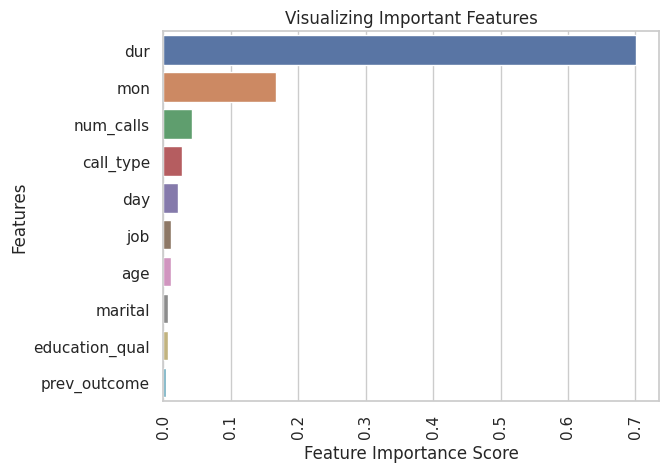

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
sns.barplot(x='Importance', y='Feature', data=feature_scores)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [ ]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,5175,713,5888
1,40,340,380
All,5215,1053,6268


In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      5888
           1       0.32      0.89      0.47       380

    accuracy                           0.88      6268
   macro avg       0.66      0.89      0.70      6268
weighted avg       0.95      0.88      0.90      6268



## **Recalibrating**

In [ ]:
import category_encoders as ce
from sklearn.model_selection import train_test_split

x = df.drop(['prev_outcome',"y","job","marital","education_qual","age"], axis=1)

y = df['y']

encoder = ce.OrdinalEncoder(cols=['call_type', 'mon'])

pipeline = Pipeline([('encoder', encoder)])
# Fit and transform the training data
x = pipeline.fit_transform(x)

x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42 )

#Balancing the data
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Training Model
model = RandomForestClassifier(n_estimators=500, max_depth=50, min_samples_leaf=100, random_state= 42)
model.fit(x_train_smt, y_train_smt)

# Predict the Test set results
y_pred = model.predict(x_test)

# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score  : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score  : 0.8845


In [ ]:
print( "The AUROC Score for Random forest model is: ",roc_auc_score( y_test, model.predict_proba(x_test)[:, 1]))

The AUROC Score for Random forest model is:  0.9461476567445574


In [ ]:
import pandas as pd

# Get the column names from the ordinal encoder
encoded_columns = pipeline.named_steps['encoder'].get_feature_names_out()

# Create a DataFrame with feature scores
feature_scores = pd.DataFrame({'Feature': encoded_columns, 'Importance': model.feature_importances_})

# Sort the DataFrame by feature importance in descending order
feature_scores = feature_scores.sort_values('Importance', ascending=False)

# Print the feature scores
print(feature_scores)

     Feature  Importance
3        dur    0.680404
2        mon    0.221145
1        day    0.050524
0  call_type    0.035712
4  num_calls    0.012215


In [ ]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)
cm = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)
print(cm)
print (classification_report(y_test, y_pred))

Predicted    no   yes   All
Actual                     
no         5175   697  5872
yes          36   360   396
All        5211  1057  6268
              precision    recall  f1-score   support

          no       0.99      0.88      0.93      5872
         yes       0.34      0.91      0.50       396

    accuracy                           0.88      6268
   macro avg       0.67      0.90      0.71      6268
weighted avg       0.95      0.88      0.91      6268



In [ ]:
y_test = y_test.map({'no' : 0, 'yes' : 1})
y_test

17694    0
16445    0
25064    0
10438    0
26096    0
        ..
12482    0
26441    0
8057     0
18967    0
21493    0
Name: y, Length: 6268, dtype: int64

In [ ]:
y_train_smt = y_train_smt.map({'no' : 0, 'yes' : 1})
y_train_smt

0        0
1        0
2        0
3        0
4        0
        ..
37529    1
37530    1
37531    1
37532    1
37533    1
Name: y, Length: 37534, dtype: int64

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train_smt,y_train_smt) #train the model
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))


Learning rate :  0.01  Train score :  0.9628603399584377  Cross-Val score :  0.9390525398596695
Learning rate :  0.02  Train score :  0.96560451856983  Cross-Val score :  0.9387348344721811
Learning rate :  0.03  Train score :  0.9698406777854746  Cross-Val score :  0.93793713153054
Learning rate :  0.04  Train score :  0.9718388660947408  Cross-Val score :  0.9382561107968878
Learning rate :  0.05  Train score :  0.976048382799595  Cross-Val score :  0.9374589174067903
Learning rate :  0.1  Train score :  0.9869984547343742  Cross-Val score :  0.9382553464695722
Learning rate :  0.11  Train score :  0.9870250972451644  Cross-Val score :  0.9371384094858117
Learning rate :  0.12  Train score :  0.9886502904033676  Cross-Val score :  0.936978665076866
Learning rate :  0.13  Train score :  0.9895294932594447  Cross-Val score :  0.9387343249206375
Learning rate :  0.14  Train score :  0.9904353386263122  Cross-Val score :  0.9382553464695723
Learning rate :  0.15  Train score :  0.9901689

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.01, n_estimators=100, verbosity = 0) # initialise the model
model.fit(x_train_smt,y_train_smt)
print( "The AUROC Score for XG Boost model is: ",roc_auc_score( y_test, model.predict_proba(x_test)[:, 1]))

The AUROC Score for XG Boost model is:  0.9456578300030275


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)
cm = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)
print(cm)
print (classification_report(y_test, y_pred))

Predicted     0     1   All
Actual                     
0          5220   652  5872
1            42   354   396
All        5262  1006  6268
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      5872
           1       0.35      0.89      0.50       396

    accuracy                           0.89      6268
   macro avg       0.67      0.89      0.72      6268
weighted avg       0.95      0.89      0.91      6268



# Conclusion

---
The AUROC Score for Logistic Regression model is : 0.9103408359553777

The AUROC Score for KNN model is : 0.8885813697797483

The AUROC Score for Random forest model is: 0.9461476567445574

The AUROC Score for XG Boost model is: 0.9456578300030275

Hence, XG Boost and Random forest both  model performs better than other models. As already told in the EDA, duration plays a major role as higher the duration, greater the customer conversion rate.
